In [82]:
#Generic
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt,joblib
from scipy.stats import zscore

#Imputer
from sklearn.impute import SimpleImputer

#Encoder
from sklearn.preprocessing import LabelEncoder

#PowerTransformer
from sklearn.preprocessing import PowerTransformer

#Scaler
from sklearn.preprocessing import MinMaxScaler

#TrainTestSplit
from sklearn.model_selection import train_test_split


#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,average_precision_score
from sklearn.metrics import adjusted_mutual_info_score,balanced_accuracy_score,roc_curve,auc

#Deep Learning
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#Import data with column names
df=pd.read_csv('adult_data.csv',na_values=[' ?'],names=['age','workclass','fnlwgt','education','education-num','marital-status',
                                      'occupation','relationship','race','sex','capital-gain','capital-loss',
                                      'hours-per-week','native-country','target'])

In [3]:
#Check head
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Check info
df.info()
#As we can see there are some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#Percent of missing values
(df.isna().sum()/df.count())*100

age               0.000000
workclass         5.975590
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.999740
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.823128
target            0.000000
dtype: float64

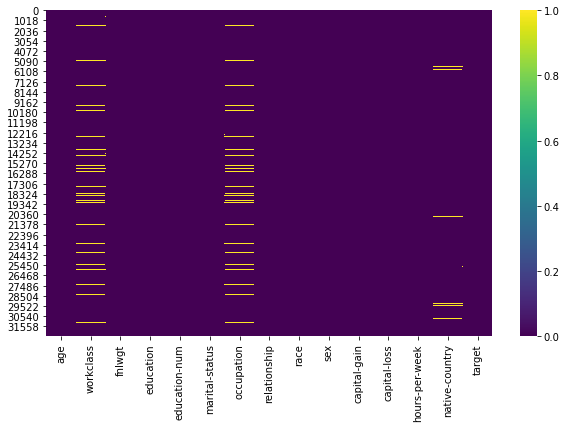

In [6]:
#Plot null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),cmap='viridis')
plt.show()

In [7]:
#Fill values in null fields
si=SimpleImputer(strategy='most_frequent')

In [8]:
#Check value count in Workclass column
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [9]:
#Fill Values for workclass_columns
df['workclass']=si.fit_transform(df['workclass'].values.reshape(-1,1))

In [10]:
#Check value count in Occupation column
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
#We would drop all the rows which are null as in occupation column the data is in normalized form and we would
#not be able to impute it with 'most_frequent' startegy
df=df.dropna()

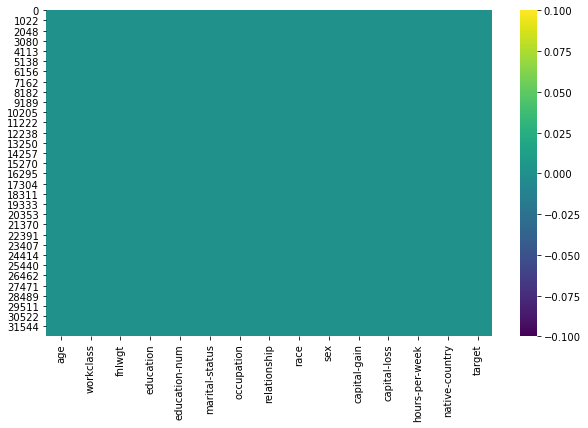

In [12]:
#Plot null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),cmap='viridis')
plt.show()
#There are no null values now

In [13]:
#Check number of columsn with object datatype
df.select_dtypes('object').columns
#We would have to encode these columns in integer format

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'target'],
      dtype='object')

In [14]:
# #Get dummies
# df_workclass=pd.get_dummies(df['workclass'])

In [15]:
# #Concat with main dataframe by dropping workclass dataframe
# df=pd.concat([df.drop('workclass',axis=1),df_workclass],axis=1)

In [16]:
# #Check number of columsn with object datatype
# df.select_dtypes('object').columns
# #We would have to encode these columns in integer format

In [17]:
# df['education'].value_counts()

In [18]:
# #Get dummies
# df_edu=pd.get_dummies(df['education'])
# #Concat with main dataframe by dropping education dataframe
# df=pd.concat([df.drop('education',axis=1),df_edu],axis=1)

In [19]:
# #Check number of columsn with object datatype
# df.select_dtypes('object').columns
# #We would have to encode these columns in integer format

In [20]:
# df['marital-status'].value_counts()

In [21]:
# #Get dummies
# df_mar=pd.get_dummies(df['marital-status'])
# #Concat with main dataframe by dropping marital-status dataframe
# df=pd.concat([df.drop('marital-status',axis=1),df_mar],axis=1)

In [22]:
# df['occupation'].value_counts()

In [23]:
# #Get dummies
# df_occu=pd.get_dummies(df['occupation'])
# #Concat with main dataframe by dropping occupation dataframe
# df=pd.concat([df.drop('occupation',axis=1),df_occu],axis=1)

In [24]:
# #Check number of columsn with object datatype
# df.select_dtypes('object').columns
# #We would have to encode these columns in integer format

In [25]:
# df['relationship'].value_counts()

In [26]:
# #Get dummies
# df_rel=pd.get_dummies(df['relationship'])
# #Concat with main dataframe by dropping realtionship dataframe
# df=pd.concat([df.drop('relationship',axis=1),df_rel],axis=1)

In [27]:
# #Check number of columsn with object datatype
# df.select_dtypes('object').columns
# #We would have to encode these columns in integer format

In [28]:
# df['race'].value_counts()

In [29]:
# #Get dummies
# df_rac=pd.get_dummies(df['race'])
# #Concat with main dataframe by dropping race dataframe
# df=pd.concat([df.drop('race',axis=1),df_rac],axis=1)

In [30]:
# #Check number of columsn with object datatype
# df.select_dtypes('object').columns
# #We would have to encode these columns in integer format

In [31]:
# df['sex'].value_counts()

In [32]:
# #Encode Sex column with LabelEncoder since there are only two columns
# le=LabelEncoder()
# df['sex']=le.fit_transform(df['sex'])

In [33]:
# #Check number of columsn with object datatype
# df.select_dtypes('object').columns
# #We would have to encode these columns in integer format

In [34]:
# df['native-country'].value_counts()

In [35]:
# #Get dummies
# df_nc=pd.get_dummies(df['native-country'])
# #Concat with main dataframe by dropping native-country dataframe
# df=pd.concat([df.drop('native-country',axis=1),df_nc],axis=1)

In [36]:
# #Check number of columsn with object datatype
# df.select_dtypes('object').columns
# #We would have to encode these columns in integer format

In [37]:
# df['target']=le.fit_transform(df['target'])

In [38]:
# df.head()
# #Now we have 68 columns

In [39]:
# #Check correlation by plotting a graph
# plt.figure(figsize=(15,6))
# df.corr()['target'].drop('target').sort_values(ascending=False).plot(kind='bar')
# plt.tight_layout()
# plt.show()

In [40]:
# #Lets drop columns which has less than 0.1 correlation with our target
# for x in df.columns:
#     if abs(df.corr()['target'][x])<0.1:
#         df=df.drop(x,axis=1)    

In [41]:
#LabelEncoder
le=LabelEncoder()

In [42]:
for x in df.select_dtypes('object').columns.tolist():
    df[x]=le.fit_transform(df[x])

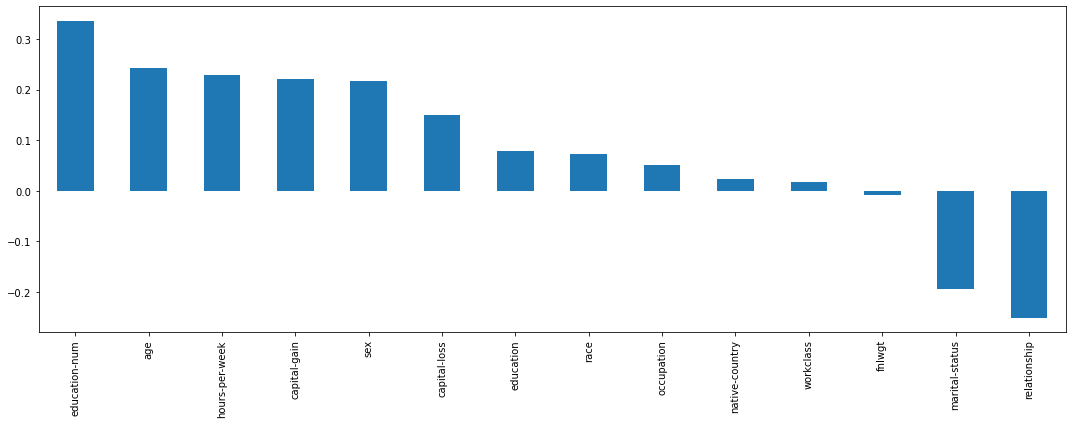

In [43]:
#Check correlation by plotting a graph
plt.figure(figsize=(15,6))
df.corr()['target'].drop('target').sort_values(ascending=False).plot(kind='bar')
plt.tight_layout()
plt.show()

In [44]:
# df.info()
# #Now we have only 25 columns
# #This way we have performed feature selection

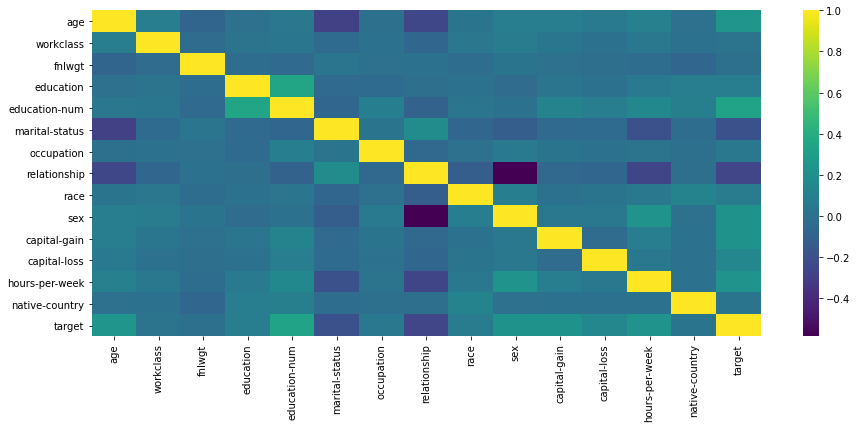

In [45]:
#Check correlation by plot
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=False,cmap='viridis')
plt.show()

In [46]:
df.corr()['target'].drop('target').sort_values(ascending=False)

education-num     0.335286
age               0.241998
hours-per-week    0.229480
capital-gain      0.221196
sex               0.216699
capital-loss      0.150053
education         0.078987
race              0.071658
occupation        0.051577
native-country    0.023268
workclass         0.018044
fnlwgt           -0.008957
marital-status   -0.193518
relationship     -0.251003
Name: target, dtype: float64

In [47]:
df.shape

(30162, 15)

In [48]:
#Find zscore and remove outliers
zs=zscore(df)
df=df[((zs<3) & (zs>-3)).all(axis=1)]

In [49]:
df.shape

(25760, 15)

In [50]:
#Check Skewness
df.skew()

age                0.443408
workclass          1.184029
fnlwgt             0.627909
education         -0.965877
education-num     -0.135247
marital-status    -0.039663
occupation         0.122640
relationship       0.788082
race              -2.641907
sex               -0.719910
capital-gain       4.843972
capital-loss      28.905740
hours-per-week    -0.285633
native-country    -5.337237
target             1.269713
dtype: float64

In [51]:
#Check value counts of capital-loss column
df['capital-loss'].value_counts()
#As we can see there are maximum 0s so we can drop the column as it is highly positive skewed

0       25717
625        12
880         6
1092        5
653         3
1258        3
213         3
323         3
974         2
810         2
1138        2
155         1
419         1
Name: capital-loss, dtype: int64

In [52]:
#Drop capital-loss
df=df.drop('capital-loss',axis=1)

In [53]:
#Create an instance of PowerTransformer
pt=PowerTransformer()
for x in df.columns.drop('target'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=pt.fit_transform(df.loc[:,x].values.reshape(-1,1))

In [54]:
#Normalize the data
scale=MinMaxScaler()

In [55]:
X=df.drop('target',axis=1)
y=df['target']

In [56]:
X=scale.fit_transform(X)

In [57]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=x)
        md=model
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        fpr,tpr,thresholds=roc_curve(y_test,predict)
        acurve=auc(fpr,tpr)
#         f1=f1_score(y_test,predict)
#         acc=accuracy_score(y_test,predict)
#         avg=(confusion_matrix(y_test,predict)[0,0]+confusion_matrix(y_test,predict)[1,1])/(confusion_matrix(y_test,predict)[0,1]+confusion_matrix(y_test,predict)[1,0])
        if acurve>max_score:
            max_score=acurve
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [58]:
#Call the function
model_select(LogisticRegression(max_iter=4000))

Max score is 0.7051960558948935 with random state 49


In [59]:
#Call the function
model_select(KNeighborsClassifier())

Max score is 0.7512595512562706 with random state 56


In [60]:
#Call the function
model_select(SVC())

Max score is 0.7193675348430209 with random state 88


In [61]:
#Call the function
model_select(DecisionTreeClassifier())

Max score is 0.7417442059568992 with random state 63


In [62]:
#Call the function
model_select(RandomForestClassifier())

Max score is 0.7746762926400335 with random state 56


In [67]:
#Call the function
model_select(AdaBoostClassifier())

Max score is 0.7780700828759257 with random state 56


In [68]:
#Call the function
model_select(GaussianNB())

Max score is 0.7764005150078928 with random state 88


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)
rf=AdaBoostClassifier()
rf.fit(X_train,y_train)
predict=rf.predict(X_test)

In [72]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5921
           1       0.75      0.62      0.68      1807

    accuracy                           0.86      7728
   macro avg       0.82      0.78      0.80      7728
weighted avg       0.86      0.86      0.86      7728



In [73]:
param={'n_estimators':np.linspace(50,500,10).astype(int).tolist(),'learning_rate':[0.001,0.01,0.1,1.0]}
gscv=GridSearchCV(AdaBoostClassifier(),param)

In [74]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]})

In [75]:
gscv.best_params_

{'learning_rate': 1.0, 'n_estimators': 400}

In [76]:
rf=AdaBoostClassifier(n_estimators=400,learning_rate=1.0)
rf.fit(X_train,y_train)
predict=rf.predict(X_test)

In [77]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      5921
           1       0.75      0.65      0.69      1807

    accuracy                           0.87      7728
   macro avg       0.82      0.79      0.80      7728
weighted avg       0.86      0.87      0.86      7728



In [84]:
cross_val_score(AdaBoostClassifier(n_estimators=400,learning_rate=1.0),X_train,y_train,cv=4).mean()
#With crossvalidation score we can say that the model is neither overfitting or underfitting

0.858307453416149

In [85]:
result_df=pd.DataFrame(y_test)
result_df.columns=['Original']
result_df=result_df.reset_index().drop('index',axis=1)
result_df=pd.concat([result_df,pd.Series(predict)],axis=1)
result_df.columns=['Original','Predicted']

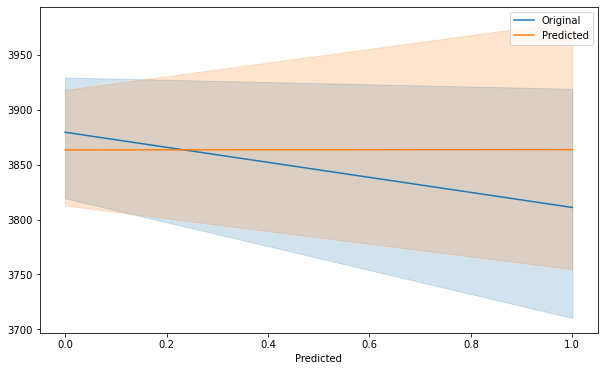

In [86]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,6))
sns.lineplot(x='Original',y=result_df.index,data=result_df,ax=ax,label='Original')
sns.lineplot(x='Predicted',y=result_df.index,data=result_df,ax=ax,label='Predicted')
plt.legend()
plt.show()

In [87]:
joblib.dump(rf,'Census Income AdaBosster.obj')

['Census Income AdaBosster.obj']

In [88]:
#In the above commented columns I have tried to use get dummies/OneHotEncoder to encode all categorical columns
#as model might misinterpret LabelEncoder encoded values 1,2,3... as rank/order
#However LabelEncoder gave better results in terms of auc score